In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy.fft as fp
import numpy as np
import pandas as pd

In [34]:
def disp_img(title="Result",*img):
    cv2.imshow(title, np.concatenate(img,axis=1))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Q1.1
### Periodic noise removal

TypeError: Image data of dtype object cannot be converted to float

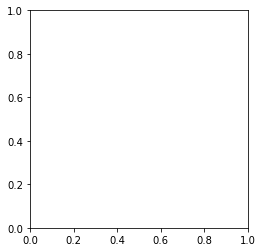

In [35]:
img = cv2.imread("Q1_1.tif",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,"gray")
img.shape

In [36]:
plt.figure()
f = fp.fft2(img)
f_shift = fp.fftshift(f)
plt.imshow(np.log10(1+abs(f_shift)))
plt.colorbar()
np.percentile(abs(f),98)

IndexError: cannot do a non-empty take from an empty axes.

<Figure size 432x288 with 0 Axes>

In [37]:
def get_filter(shape,d0):
    H,W = shape
    h,w = 30,30
    fil = np.zeros(img.shape)
    for u in range(H):
        for v in range(W):
            if H//2-h<u<H//2+h and W//2-w<v<W//2+w:
                fil[u,v] = 1
            elif abs(f_shift[u,v])>= d0:
                fil[u,v] = 0
            else:
                fil[u,v] =  1
    return fil

fil1 = get_filter(img.shape,10**5)
fil2 = get_filter(img.shape,10**4.9)
fil3 = get_filter(img.shape,10**4.8)

op = fil1*f_shift
op2 = fil2*f_shift
op3 = fil3*f_shift
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(fil1)
plt.colorbar()
plt.subplot(222)
plt.imshow(fil2)
plt.colorbar()
plt.subplot(223)
plt.imshow(fil3)
plt.colorbar()

AttributeError: 'NoneType' object has no attribute 'shape'

In [38]:
op_final1 = fp.ifft2(fp.ifftshift(op))
op_final2 = fp.ifft2(fp.ifftshift(op2))
op_final3 = fp.ifft2(fp.ifftshift(op3))

NameError: name 'op' is not defined

NameError: name 'op_final1' is not defined

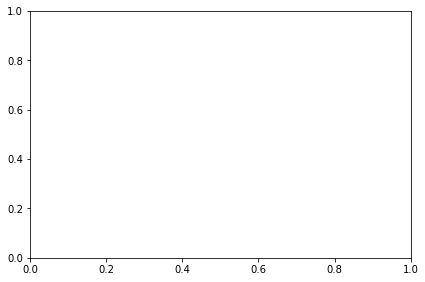

In [39]:
plt.figure(figsize =(15,10))
plt.subplot(221)
plt.imshow(20*abs(op_final1),"gray")
plt.subplot(222)
plt.imshow(20*abs(op_final2),"gray")
plt.subplot(223)
plt.imshow(20*abs(op_final3),"gray")
plt.subplot(224)
plt.imshow(img,"gray")

# Q1.2
### Histogram equalization

In [40]:
img2= cv2.imread("Q1_2.tif",cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("Q1_3.tif",cv2.IMREAD_GRAYSCALE)

In [41]:
def equalize(img):
    
    M,N = img.shape
    
    rk,nk = np.unique(img,return_counts=True)
    
    data = pd.DataFrame({"rk":np.arange(0,256,1),"nk":np.zeros(256)})
    data.loc[rk,"nk"] =nk
    
    data["pdf"]  = data["nk"]/(M*N)
    data["cdf"] = data["pdf"].cumsum()
    data["Sk"] = data["cdf"]*255
    data["Sk_rounded"] = np.round(data["Sk"])
    res = pd.merge(data,data.groupby("Sk_rounded").sum()["nk"],on="Sk_rounded",suffixes=("_old","_new"))

    image_equalized = np.interp(img.flatten(),res.loc[rk,"rk"],res.loc[rk,"Sk_rounded"])
    img_out = np.round(image_equalized.reshape(img2.shape)).astype("uint8")
    
    f = plt.figure(figsize=(10,5))
    ax = f.add_subplot(1,2,1)
    ax.bar(data["rk"],data["nk"])
    ax2 = f.add_subplot(1,2,2)
    ax2.bar(res["Sk_rounded"],res["nk_new"])
    
    return img_out,res

In [42]:
img_out2,res2 = equalize(img2)
img_out3,res2 = equalize(img3)

AttributeError: 'NoneType' object has no attribute 'shape'

In [15]:
disp_img("Histogram Equalization 1",img2,img_out2)

NameError: name 'img_out2' is not defined

In [27]:
disp_img("Histogram Equalization 2",img3,img_out3)

In [ ]:
# image_histogram,bins = np.histogram(img2.flatten(),256,density=True)
# cdf = image_histogram.cumsum()
# cdf = 255 * cdf / cdf[-1]
# image_equalized = np.interp(img2.flatten(), bins[:-1], cdf)
# r = np.round(image_equalized.reshape(img2.shape)).astype("uint8")
# disp_img("op",r)

# Q1.3
### Salt and Pepper noise - Median Filter

# Q1.4
### Gradient - Sobel and Perwitt Filter

In [53]:
img5 = cv2.imread("../images/Q1_5.tif",cv2.IMREAD_GRAYSCALE)
img5.shape


(512, 512)

In [54]:
def apply_filter(img,operator,padding="constant"):
    
    y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    x = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    
    mat = img.copy()
    mat_padded = np.pad(mat,[1,1],mode = padding)
    M,N = mat.shape
    for i in range(1,M+1):
        for j in range(1,N+1):
            mat[i-1,j-1] = operator(mat_padded[x+i,y+j])
    return mat

def sobel_filter(mat):
    mask = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    return (mat*mask).sum()

def prewitt_filter(mat):
    mask = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    return (mat*mask).sum()
    

In [56]:
img_out4 = apply_filter(img5,np.median,"constant")

In [57]:
disp_img("Median Filter",img4,img_out4)

ValueError: zero-dimensional arrays cannot be concatenated

In [58]:
img_out5= apply_filter(img5,sobel_filter,"edge")

In [59]:
img_out6 = apply_filter(img5,prewitt_filter)

In [60]:
disp_img("Gradient",img5,img_out5,img_out6)

# Q3

In [32]:
img6 = cv2.imread("images/q3_1.jpg",cv2.IMREAD_GRAYSCALE)
img6.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [29]:
def otsu_segmentation(img):
    M,N = img.shape
    rk,nk = np.unique(img,return_counts=True)
    T = pd.DataFrame(columns=["th","wb","wf","mb","mf","Between Class Variance"])
    for t in range(rk.shape[0]):
        wb,wf = (nk[:t].sum()/(M*N)),(nk[t:].sum()/(M*N))
        if nk[:t].sum()!=0:
            mb,mf = (((nk[:t]*rk[:t]).sum())/(nk[:t].sum())),(((nk[t:]*rk[t:]).sum())/(nk[t:].sum()))
        else:
            mb,mf = 0,(((nk[t:]*rk[t:]).sum())/(nk[t:].sum()))
        D = { "th":rk[t], "wb":wb, "wf": wf, "mb":mb, "mf": mf, "Between Class Variance": wb*wf*((mb-mf)**2)}
        T = T.append(D,ignore_index= True)
    threshold  = T.sort_values(by=["Between Class Variance"],ascending=False).head(1)["th"].iloc[0]
    return threshold 

In [30]:
threshold = otsu_segmentation(img6)
# disp_img("Seg1",img6,((img6>threshold )*255).astype("uint8"))

AttributeError: 'NoneType' object has no attribute 'shape'